In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging 
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests import *

from autils import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)

Metal device set to: Apple M1 Pro


2022-10-04 18:39:11.996242: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-04 18:39:11.996396: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


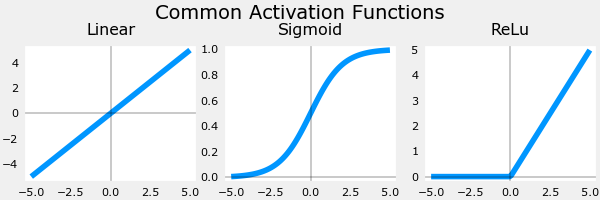

In [3]:
plt_act_trio()

The Sigmoid function is best for on off or binary situations. The ReLu provides a continous linear relationship. Additionally it has an off rangne where the output is zero. 
The "off" feature makes the ReLu a Non-Linear activation - This enables multiple units to contribute to the resulting function without interfering.


# Softmax Function:

Softmax function converts each output in a value between 0 and 1 - outputs will sum to 1. These can be interpreted as probabilities.

In [4]:
# NumPy implementation of softmax - vector implementation
def my_softmax(z):
    """
    Args: z(ndarray(N,)): input data, N features
    Returns: a(ndarray(N,)): softmax of z
    """
    ez = np.exp(z)
    a = ez/(np.sum(ez))
    
    return a 


In [5]:
# Testing the my_softmax
z = np.array([1.,2.,3.,4.,5.])
a = my_softmax(z)
atf = tf.nn.softmax(z)

print(f"my_softmax(z):{a}")
print(f"tensorflow_softmax(z): {atf}")

test_my_softmax(my_softmax)

my_softmax(z):[0.01 0.03 0.09 0.23 0.64]
tensorflow_softmax(z): [0.01 0.03 0.09 0.23 0.64]
 All tests passed.


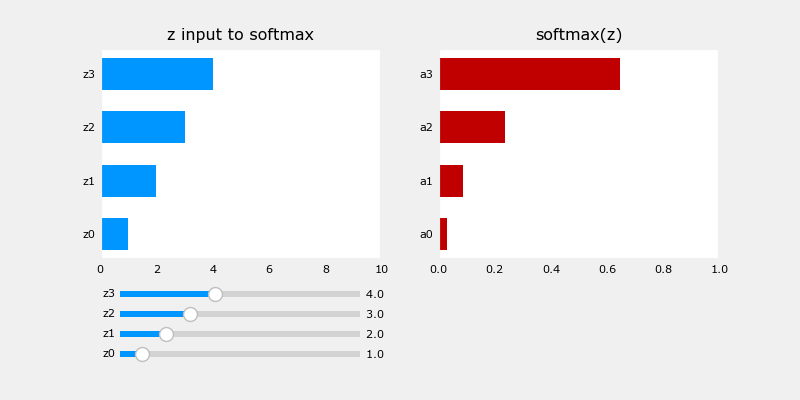

In [6]:
# plt.close("all")
plt_softmax(my_softmax)

# Neural networks

In [7]:
#load the dataset
X,y = load_data()

In [8]:
print(" The first element of X is:", X[0])
print(X.shape)

 The first element of X is: [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

In [9]:
print("The first element of y:", y[0,0])  
print(y.shape)

The first element of y: 0
(5000, 1)


## Visualizing the Data

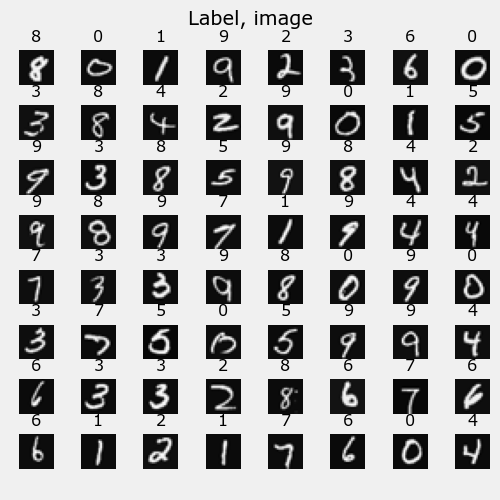

In [10]:
import warnings
warnings.simplefilter(action ='ignore', category = FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize = (5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

## Model Representation and Implementation

The neural network: 
It has 2 Dense layers with ReLu activations and one output layer with a linear activation.

In [11]:
# Build the model 
tf.random.set_seed(1234)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer((400,)),
    tf.keras.layers.Dense(25, activation="relu", name = "L1"),
    tf.keras.layers.Dense(15, activation="relu", name = "L2"),
    tf.keras.layers.Dense(10, activation="linear", name = "L3")
], name = "my_model"
)

# Compile model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))


In [12]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Testing 
test_model(model,10,400)

All tests passed!


In [14]:
# Let's examine the weights for layers.
[layer1, layer2, layer3] = model.layers

In [15]:
## Examine weights shapes
W1,b1 = layer1.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape: {b1.shape}")
W2,b2 = layer2.get_weights()
print(f"W2 shape = {W2.shape}, b2 shape: {b2.shape}")
W3,b3 = layer3.get_weights()
print(f"W3 shape = {W3.shape}, b3 shape: {b3.shape}")

W1 shape = (400, 25), b1 shape: (25,)
W2 shape = (25, 15), b2 shape: (15,)
W3 shape = (15, 10), b3 shape: (10,)


In [16]:
#compile model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
             metrics = ["accuracy"],
             )

#fit the model 
history = model.fit(X,
                    y,
                    epochs=40)

Epoch 1/40


2022-10-04 18:39:30.825103: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-04 18:39:30.983444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 2s 6ms/step - loss: 1.7094 - accuracy: 0.4044
Epoch 2/40
157/157 [==============================] - 1s 5ms/step - loss: 0.7480 - accuracy: 0.8034
Epoch 3/40
157/157 [==============================] - 1s 5ms/step - loss: 0.4428 - accuracy: 0.8866
Epoch 4/40
157/157 [==============================] - 1s 5ms/step - loss: 0.3463 - accuracy: 0.9086
Epoch 5/40
157/157 [==============================] - 1s 5ms/step - loss: 0.2977 - accuracy: 0.9184
Epoch 6/40
157/157 [==============================] - 1s 5ms/step - loss: 0.2630 - accuracy: 0.9282
Epoch 7/40
157/157 [==============================] - 1s 5ms/step - loss: 0.2361 - accuracy: 0.9352
Epoch 8/40
157/157 [==============================] - 1s 5ms/step - loss: 0.2131 - accuracy: 0.9454
Epoch 9/40
157/157 [==============================] - 1s 5ms/step - loss: 0.2004 - accuracy: 0.9438
Epoch 10/40
157/157 [==============================] - 1s 5ms/step - loss: 0.1805 - accuracy: 0.9526
Epoch 11/4

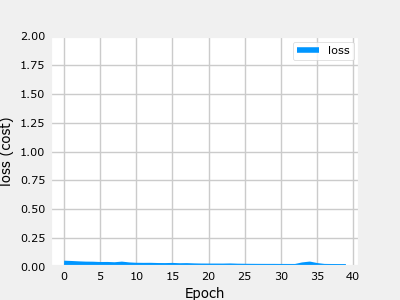

In [27]:
# Plot the history
plot_loss_tf(history)

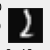

1/1 [==============================] - 0s 9ms/step
 Predicting a two : [[-13.07  -4.     2.16  -3.82 -23.05 -15.45 -18.8   -8.48 -10.04 -12.58]]
 Largest Prediction Index : 2


In [31]:
# Make prediction 
image_of_two = X[1015]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,400))
print(f" Predicting a two : {prediction}")
print(f" Largest Prediction Index : {np.argmax(prediction)}")

1/1 [==============================] - 0s 8ms/step


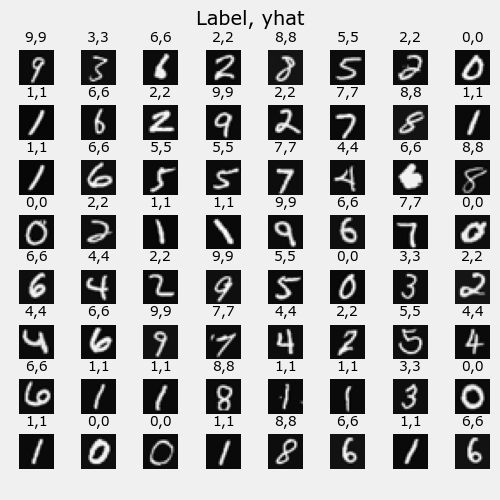

In [32]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [33]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

157/157 [==============================] - 0s 2ms/step
no errors found
0 errors out of 5000 images


# Bahahaha! Zero errors! Congratulations!